In [1]:
import sys, os, re
sys.path.append("/awlab/users/chsu/WorkSpace/tensorflow/segmentation/code")

import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt

import data_io

In [2]:
result_dir = r'/awlab/users/chsu/WorkSpace/tensorflow/segmentation/results/archive/incucyte_nuc_weighted_bce_dice_20190425_20-22-26_2019028023_PC9_A549_with_nuclear_marker'

In [3]:
file_type = '*.png'
filter_pattern = None
file_paths = data_io.get_filenames(result_dir, file_type, filter_pattern)

In [4]:
N = len(file_paths)
diff = np.zeros(N)
for i, f in enumerate(file_paths):
    print("{}/{}".format(i+1, N), end='\r')
    img = cv2.imread(f)
    b,g,r = cv2.split(img)
    
    d = np.abs(g-r) > 0
    diff[i] = (d.sum())

In [5]:
# Get well, column, row, frame, time from file name
file_names = [os.path.basename(f) for f in file_paths]
pattern = re.compile('_(?P<row>[A-Z])(?P<col>\d+)_(?P<frame>\d)_(?P<time>.*)\.png$')
metadata = [pattern.search(f).groupdict() for f in file_names]

In [6]:
df = pd.DataFrame(metadata)
df['diff'] = diff
df['file'] = file_paths
df = df[['time', 'row', 'col', 'frame', 'diff', 'file']]
df.head()

,time,row,col,frame,diff,file
0,00d00h00m,A,10,1,3006.0,/awlab/users/chsu/WorkSpace/tensorflow/segment...
1,00d02h00m,A,10,1,2155.0,/awlab/users/chsu/WorkSpace/tensorflow/segment...
2,00d04h00m,A,10,1,2185.0,/awlab/users/chsu/WorkSpace/tensorflow/segment...
3,00d06h00m,A,10,1,2022.0,/awlab/users/chsu/WorkSpace/tensorflow/segment...
4,00d08h00m,A,10,1,1989.0,/awlab/users/chsu/WorkSpace/tensorflow/segment...


In [7]:
df = df.sort_values(by=['diff'], ascending=False)
df.head()

,time,row,col,frame,diff,file
1156,01d00h00m,C,2,1,316475.0,/awlab/users/chsu/WorkSpace/tensorflow/segment...
662,01d00h00m,B,2,3,315013.0,/awlab/users/chsu/WorkSpace/tensorflow/segment...
1155,00d22h00m,C,2,1,314953.0,/awlab/users/chsu/WorkSpace/tensorflow/segment...
1169,01d00h00m,C,2,2,313108.0,/awlab/users/chsu/WorkSpace/tensorflow/segment...
129,01d00h00m,A,2,2,310827.0,/awlab/users/chsu/WorkSpace/tensorflow/segment...


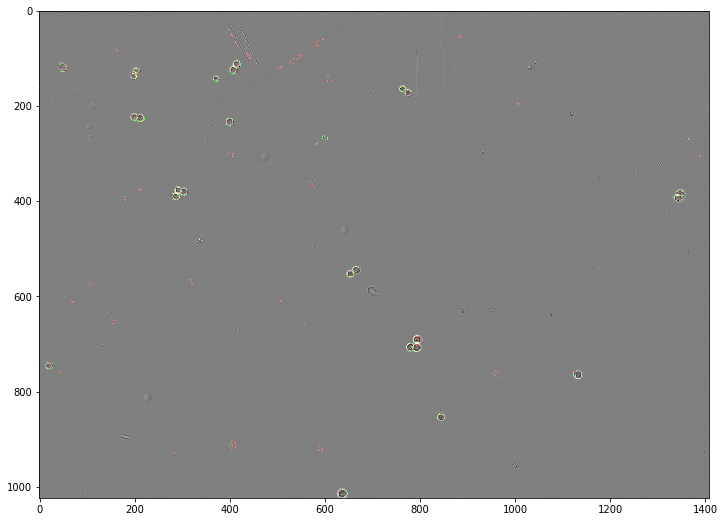

In [8]:
%matplotlib inline
img = cv2.imread(df.loc[1,'file'])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,16))
plt.imshow(img)

In [16]:
img = np.random.rand(1000,1000)*255.
print(img.shape)
cv2.imwrite('test.png', np.uint8(img))

(1000, 1000)


True